# Liver Disease Prediction on Indian Patients

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
df = pd.read_csv('LiverData.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,Male,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,Male,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,Male,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,Male,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [78]:
df.info

<bound method DataFrame.info of      Gender  Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    Female   65              0.7               0.1                   187   
1      Male   62             10.9               5.5                   699   
2      Male   62              7.3               4.1                   490   
3      Male   58              1.0               0.4                   182   
4      Male   72              3.9               2.0                   195   
..      ...  ...              ...               ...                   ...   
578    Male   60              0.5               0.1                   500   
579    Male   40              0.6               0.1                    98   
580    Male   52              0.8               0.2                   245   
581    Male   31              1.3               0.5                   184   
582    Male   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Am

In [79]:
df.isnull()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df.isnull().sum()

Gender                        0
Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [81]:
df = df.dropna(axis=0,subset=['Albumin_and_Globulin_Ratio'])

In [82]:
df.isnull().sum()

Gender                        0
Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      579 non-null    object 
 1   Age                         579 non-null    int64  
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [84]:
df.head()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,Male,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,Male,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,Male,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,Male,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


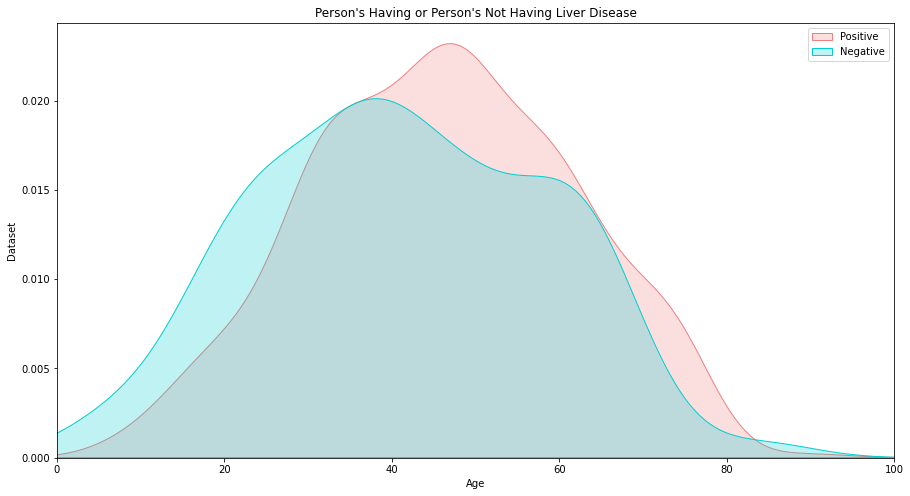

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))

sns.kdeplot(
    df.Age[df.Dataset == 1], 
    color="lightcoral", 
    shade=True
)

sns.kdeplot(
    df.Age[df.Dataset == 2], 
    color="darkturquoise", 
    shade=True
)

plt.legend(['Positive', 'Negative'])
plt.title("Person's Having or Person's Not Having Liver Disease")
plt.xlabel('Age')
plt.ylabel('Dataset')
plt.xlim(0,100)
plt.show()

<AxesSubplot:>

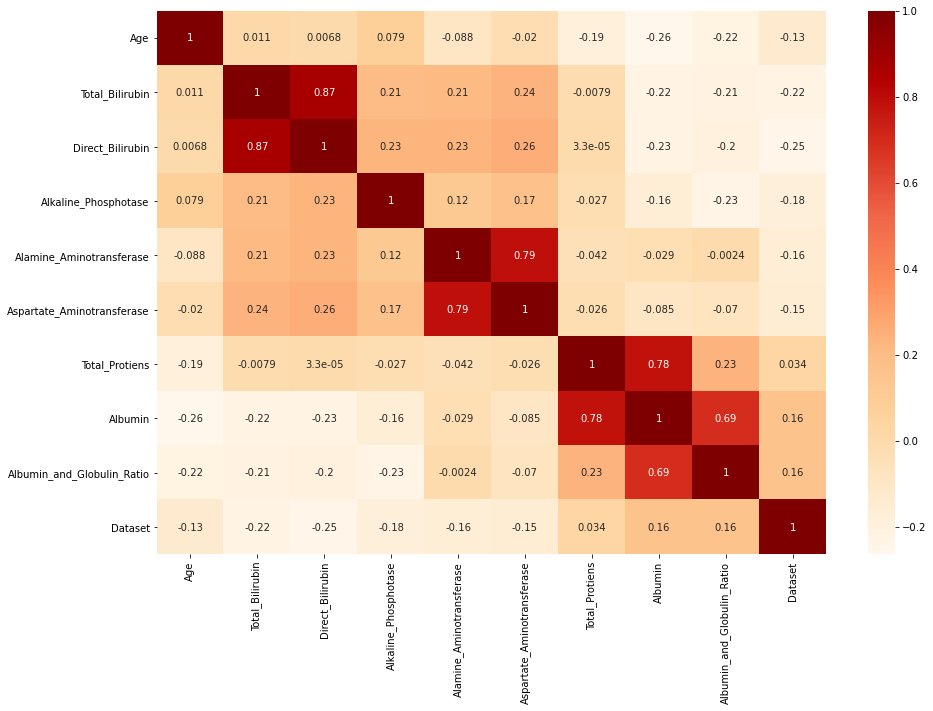

In [86]:
cormap = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cormap, annot = True, xticklabels=cormap.columns,
        yticklabels=cormap.columns,cmap="OrRd")

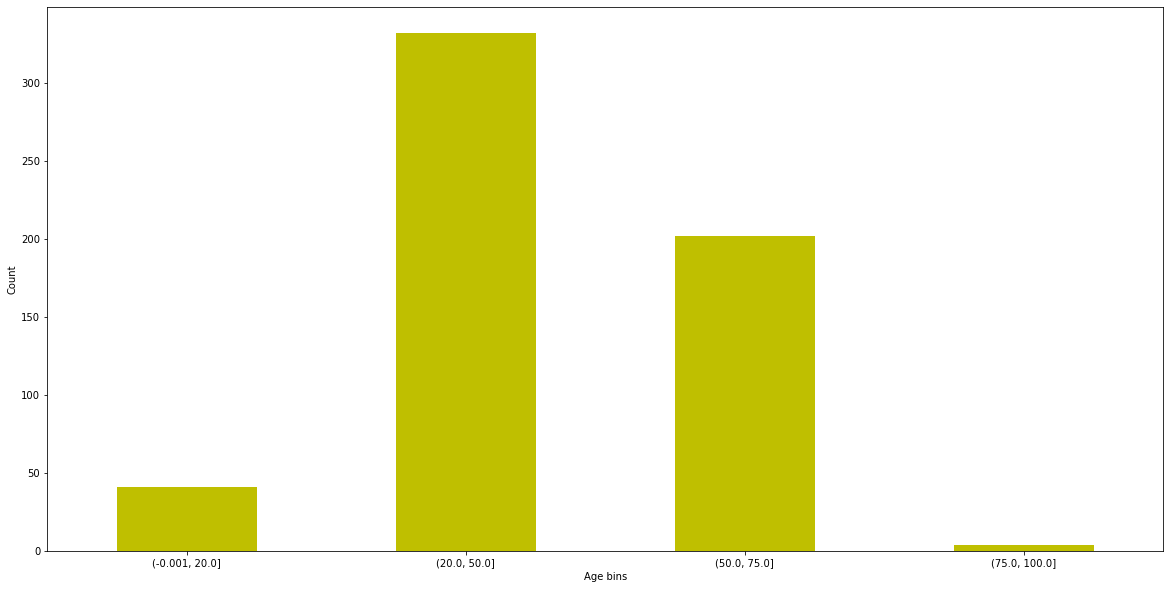

In [87]:
# Histogram for liver Disease Finding out in which age group systoms of liver disease found out
bins = [0, 20, 50, 75, 100]

out = pd.cut(
    df.Age, 
    bins=bins,
    include_lowest=True
)

ax = out.value_counts(sort=False).plot.bar(
    rot=0, 
    color="y", 
    figsize=(20,10)
)

plt.xlabel('Age bins')
plt.ylabel('Count')
plt.show()

This Histogram describes the level of disease spread in between the age groups of the people such like shown in above diagram
India people of age between 20 to 50 suffer most by Liver disease.

In [88]:
#df["TB"] = df["DB"]/df["TB"]*100
#Total Bilirubinb(TB) = DB/TB Percentage
# Allumin = put ratio of (Albumin/Albumin and Globulin Ratio)
#df["Albumin"] = df["Albumin"]/df["A/G Ratio"]

In [89]:
df

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,Male,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,Male,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,Male,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,Male,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,Male,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,Male,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,Male,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,Male,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [90]:
#df = df.drop(["DB", "A/G Ratio"], axis = 1)
#df.head()

In [91]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [92]:
print(x)

[['Female' 65 0.7 ... 6.8 3.3 0.9]
 ['Male' 62 10.9 ... 7.5 3.2 0.74]
 ['Male' 62 7.3 ... 7.0 3.3 0.89]
 ...
 ['Male' 52 0.8 ... 6.4 3.2 1.0]
 ['Male' 31 1.3 ... 6.8 3.4 1.0]
 ['Male' 38 1.0 ... 7.3 4.4 1.5]]


In [93]:
print(y)

[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1
 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1
 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1
 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1 2 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 2 1 2
 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1
 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2 1 1 2 1
 1 1 1 2 2 1 2 1 2 1 2 1 

In [94]:
# Encoding the In-Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#x[: ,"Gender"] = le.fit_transform(x[: ,"Gender"].astype('str'))

x[:,0] = le.fit_transform(x[:,0].astype('str'))

In [95]:
print(x)

[[0 65 0.7 ... 6.8 3.3 0.9]
 [1 62 10.9 ... 7.5 3.2 0.74]
 [1 62 7.3 ... 7.0 3.3 0.89]
 ...
 [1 52 0.8 ... 6.4 3.2 1.0]
 [1 31 1.3 ... 6.8 3.4 1.0]
 [1 38 1.0 ... 7.3 4.4 1.5]]


In [96]:
print(y)

[1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 2
 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 2 2 2 2 2
 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 2 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1
 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1
 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1
 2 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 1 2 1 2 2 2 2 2 1 1 1 2 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 2 1 2
 2 1 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1
 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2 1 1 2 1
 1 1 1 2 2 1 2 1 2 1 2 1 

Splitting the dataset into the Training set and Test set

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [98]:
print(x_train)

[[1 17 0.9 ... 7.3 4.0 1.2]
 [1 12 1.0 ... 7.2 3.7 1.0]
 [1 32 18.0 ... 5.4 2.6 0.9]
 ...
 [0 75 0.8 ... 4.4 2.0 0.8]
 [1 22 0.8 ... 7.9 3.8 0.9]
 [0 46 14.2 ... 4.3 2.0 0.8]]


In [99]:
print(x_test)

[[1 60 2.3 ... 6.6 3.5 1.1]
 [1 53 1.6 ... 6.5 3.9 1.5]
 [0 48 0.8 ... 7.5 3.9 1.0]
 ...
 [0 23 2.3 ... 6.9 2.9 0.7]
 [1 68 0.7 ... 5.8 2.9 1.0]
 [1 75 1.8 ... 6.1 2.9 0.9]]


In [100]:
print(y_train)

[2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1
 1 2 2 2 1 1 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 2 1 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1
 2 2 1 1 2 2 1 2 2 1 2 1 2 2 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2
 2 2 1 1 2 2 1 1 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 1 1 1 2 2 1 2 1 1 2 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 2 2 1
 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 2 2 1 1
 2 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2
 1 2 1 1 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 1 2 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1]


In [101]:
print(y_test)

[1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1 1 1
 2 2 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2
 1 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 2 1 1]


Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 1:] = sc.fit_transform(x_train[:, 1:])
x_test[:, 1:] = sc.transform(x_test[:, 1:])

In [103]:
print(x_train)

[[1 -1.6872305429461436 -0.37772145176895516 ... 0.7545782771110957
  1.0816142129234363 0.8131526207093615]
 [1 -1.9928356369857587 -0.3618285917027041 ... 0.6620054784088072
  0.7006907489907146 0.17182792368451794]
 [1 -0.7704152608272979 2.339957619559969 ... -1.0043048982323932
  -0.6960286187625991 -0.14883442482790382]
 ...
 [0 1.8577885479133929 -0.3936143118352061 ... -1.9300328852552822
  -1.457875546628043 -0.4694967733403256]
 [1 -1.3816254489065283 -0.3936143118352061 ... 1.3100150693248298
  0.8276652369682882 -0.14883442482790382]
 [0 0.08527900248362465 1.7360289370424302 ... -2.0226056839575715
  -1.457875546628043 -0.4694967733403256]]


In [104]:
print(x_test)

[[1 0.9409732657945472 -0.15522141084144092 ... 0.10656868619507318
  0.4467417730355665 0.4924902721969401]
 [1 0.5131261341390859 -0.266471431305198 ... 0.013995887492784584
  0.9546397249458622 1.7751396662466272]
 [0 0.20752104009947073 -0.3936143118352061 ... 0.9397238745156737
  0.9546397249458622 0.17182792368451794]
 ...
 [0 -1.3205044300986053 -0.15522141084144092 ... 0.3842870823019406
  -0.31510515482987744 -0.7901591218527477]
 [1 1.4299414162579316 -0.4095071719014572 ... -0.6340137034232379
  -0.31510515482987744 0.17182792368451794]
 [1 1.8577885479133929 -0.23468571117269596 ... -0.3562953073163714
  -0.31510515482987744 -0.14883442482790382]]


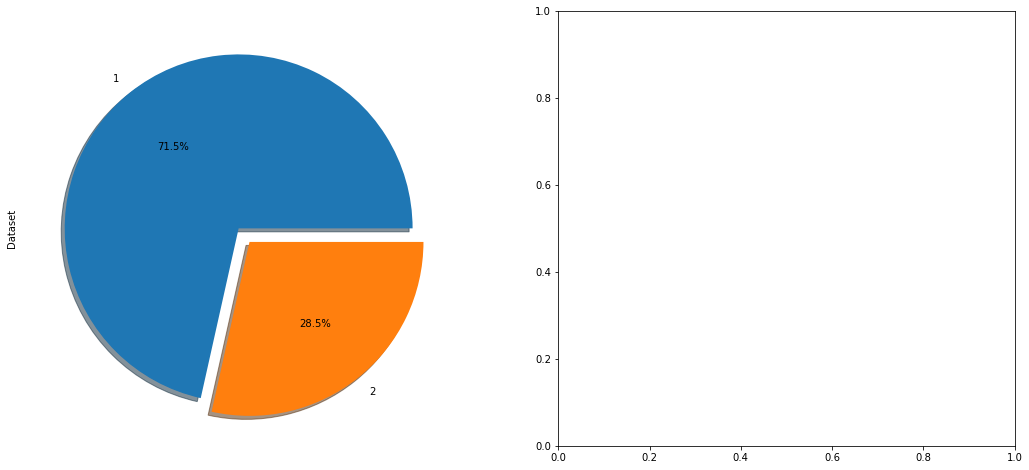

In [105]:
f, ax=plt.subplots(1,2,figsize=(18,8))
df["Dataset"].value_counts().plot.pie(
    explode=[0,0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)

plt.show()

# Logistic Regression

Training the Logistic Regression model on the Training set

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

Predicting the Test set results

In [107]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]]


Making the Confusion Matrix

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82  0]
 [27  7]]


In [109]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [110]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,1
1,2,1
2,1,1
3,2,1
4,1,1


In [111]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7672413793103449
Precision: 0.7522935779816514
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

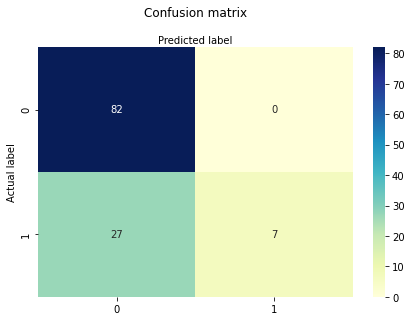

In [112]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [113]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [114]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        82
           2       1.00      0.21      0.34        34

    accuracy                           0.77       116
   macro avg       0.88      0.60      0.60       116
weighted avg       0.82      0.77      0.71       116



# K-Nearest Neighbors Algorithm  (KNN)

In [115]:
# model training 
from sklearn.neighbors import KNeighborsClassifier as KNN
# using KNN function to apply KKN ALgo on model
model= KNN()   
model.fit(x_train, y_train)

KNeighborsClassifier()

In [116]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [117]:
from sklearn.model_selection import GridSearchCV
n_neighbors = [x for x in range(5, 86, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [118]:
new_model = KNN() 
knn_grid = GridSearchCV(estimator = new_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'weights': ['uniform', 'distance']})

In [119]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 75, 'weights': 'distance'}

In [120]:
y_pred = classifier.predict(x_test)

In [121]:
cm = confusion_matrix(y_test, y_pred)

In [122]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,1
1,2,1
2,1,1
3,2,1
4,1,1


In [123]:
from sklearn import metrics
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7672413793103449
Precision: 0.7522935779816514
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

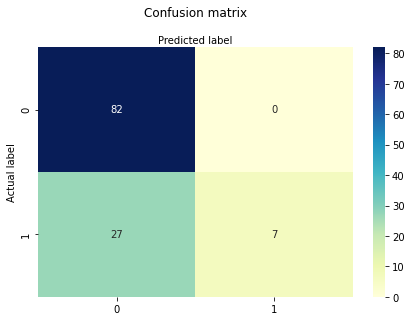

In [124]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [125]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        82
           2       1.00      0.21      0.34        34

    accuracy                           0.77       116
   macro avg       0.88      0.60      0.60       116
weighted avg       0.82      0.77      0.71       116



# Support Vector Machine (SVM)

In [126]:
from sklearn.svm import SVC # Support Vector Classifier
model = SVC()

In [127]:
model.fit(x_train,y_train)

SVC()

In [128]:
model.score(x_test,y_test)

0.7068965517241379

In [129]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [130]:
print("Liver Dataset classification with SVC")
lsvc = LinearSVC()

lsvc.fit(x_train, y_train)
score = lsvc.score(x_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, x_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean()+" ")
print()

y_pred = lsvc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr) 

Liver Dataset classification with SVC
Score:  0.7321814254859611
CV average score: 0.71 

[[82  0]
 [28  6]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.85        82
           2       1.00      0.18      0.30        34

    accuracy                           0.76       116
   macro avg       0.87      0.59      0.58       116
weighted avg       0.82      0.76      0.69       116



C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [131]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,1
1,2,1
2,1,1
3,2,1
4,1,1


In [132]:
from sklearn import metrics
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7586206896551724
Precision: 0.7454545454545455
Recall: 1.0


Text(0.5, 257.44, 'Predicted label')

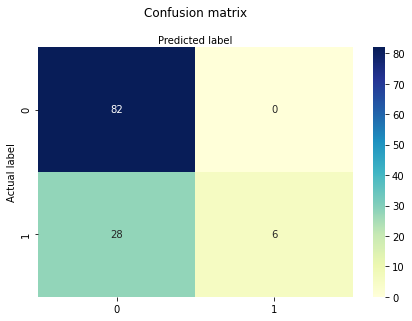

In [133]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

# Naive Bayes Algorithm 

In [134]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

In [135]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,2
1,2,2
2,1,2
3,2,2
4,1,1


In [136]:
from sklearn import metrics
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.5603448275862069
Precision: 1.0
Recall: 0.3780487804878049


In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31 51]
 [ 0 34]]


Text(0.5, 257.44, 'Predicted label')

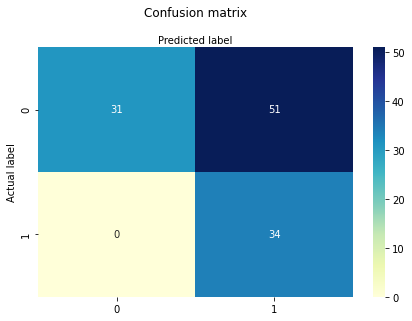

In [138]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [139]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.38      0.55        82
           2       0.40      1.00      0.57        34

    accuracy                           0.56       116
   macro avg       0.70      0.69      0.56       116
weighted avg       0.82      0.56      0.56       116



# Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [142]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
0,1,2
1,2,2
2,1,2
3,2,2
4,1,1


In [143]:
from sklearn import metrics
print("Accuracy:",accuracy_score(y_test, pred_rf))
print("Precision:",precision_score(y_test, pred_rf))
print("Recall:",recall_score(y_test, pred_rf))

Accuracy: 0.6724137931034483
Precision: 0.7291666666666666
Recall: 0.8536585365853658


In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rf)
print(cm)

[[70 12]
 [26  8]]


Text(0.5, 257.44, 'Predicted label')

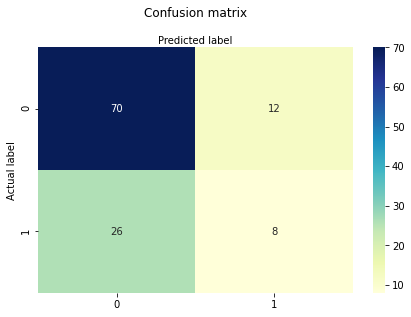

In [145]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [146]:
cr = classification_report(y_test, pred_rf)
print(cr)

              precision    recall  f1-score   support

           1       0.73      0.85      0.79        82
           2       0.40      0.24      0.30        34

    accuracy                           0.67       116
   macro avg       0.56      0.54      0.54       116
weighted avg       0.63      0.67      0.64       116



# CONCLUSION

In conclusion, we choose the logistic classification model and KNN Algorithm, the model has a good capability in separating patients with liver disease and no disease. Secondly, the model's interpretability gives us insight on which predictors to be used in classifying whether patient have liver disease or not, whereas we couldn't interpret it as by Naïve Byes From the model summary, we can conclude:


➢ Gender doesn't significantly affect the probability of patient having a liver disease.
➢ Older patients between age 50 to 75 have significantly higher probability of having a liver disease.
➢ Higher Albumin present in the blood significantly decrease the probability of patient having a liver disease.
➢ Other test results such as higher DB/TB Percentage, Globulin, ALP, ALT, AST will significantly increase the probability of patient having a liver disease.

# Receiver Operating Characteristic(ROC) Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
It shows the tradeoff between sensitivity and specificity.

In [147]:
#from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [148]:
y_test = y_test.tolist()
y_test = [I - 1 for I in y_test]

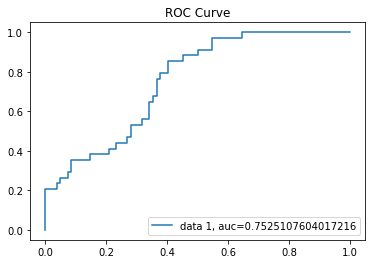

<Figure size 1080x1080 with 0 Axes>

In [149]:
y_pred_proba = classifier.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve')
plt.figure(figsize=(15,15))
plt.show()